# NAND-gate

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
# Data
x_train = torch.tensor([[1, 1], [0, 0], [1, 0], [0, 1]]).float()
y_train = torch.tensor([[0], [1], [1], [1]]).float()

In [3]:
# Model
class SigmoidModel:

    def __init__(self):
        # Model variables
        self.W = torch.tensor([[-8.83], [-8.83]], requires_grad=True)
        self.b = torch.tensor([[13.42]], requires_grad=True)

    def logits(self, x):
        return torch.Tensor(x) @ self.W + self.b

    # Predictor
    def f(self, x):
        return torch.sigmoid(self.logits(x))

    # Cross Entropy loss
    def loss(self, x, y):
        return torch.nn.functional.binary_cross_entropy_with_logits(self.logits(x), y)

In [4]:
# Optimization
model = SigmoidModel()
optimizer = torch.optim.SGD([model.W, model.b], 0.01)

for epoch in range(10_000):
    model.loss(x_train, y_train).backward()
    optimizer.step()
    optimizer.zero_grad()

print("W = %s, b = %s, loss = %s" % (model.W, model.b, model.loss(x_train, y_train)))

W = tensor([[-8.9284],
        [-8.9284]], requires_grad=True), b = tensor([[13.5643]], requires_grad=True), loss = tensor(0.0082, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


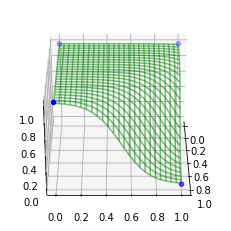

In [5]:
# Visualization
x_grid, y_grid = np.meshgrid(np.linspace(0, 1, 25), np.linspace(0, 1, 25))
z_grid = np.empty([25, 25])

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter3D(x_train[:, 0].squeeze(), x_train[:, 1].squeeze(), y_train[:, 0].squeeze(), marker='o', color='blue')
 
for i in range(0, x_grid.shape[0]):
    for j in range(0, x_grid.shape[1]):
        z_grid[i, j] = model.f([[x_grid[i, j], y_grid[i, j]]])

ax.plot_wireframe(x_grid, y_grid, z_grid, color='green', alpha=0.50)
ax.view_init(30, 0)
plt.show()
